# Предсказание цены биткоина 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from prophet import Prophet

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
matplotlib.rcParams.update({'font.size': 14})

Чтение и подготовка данных

In [2]:
df = pd.read_csv('BTC_USD_2021_2022.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-19,31800.011719,31885.859375,30563.734375,30817.832031,30817.832031,20434789545
1,2021-07-20,30838.285156,31006.187500,29360.955078,29807.347656,29807.347656,23148267245
2,2021-07-21,29796.285156,32752.326172,29526.183594,32110.693359,32110.693359,28203024559
3,2021-07-22,32138.873047,32576.400391,31745.298828,32313.105469,32313.105469,19555230518
4,2021-07-23,32305.958984,33581.550781,32057.892578,33581.550781,33581.550781,22552046192
...,...,...,...,...,...,...,...
361,2022-07-15,20573.156250,21138.244141,20397.000000,20836.328125,20836.328125,25905575359
362,2022-07-16,20834.103516,21514.404297,20518.898438,21190.316406,21190.316406,24302954056
363,2022-07-17,21195.041016,21600.640625,20778.179688,20779.343750,20779.343750,22927802083
364,2022-07-18,20781.912109,22633.033203,20781.912109,22485.689453,22485.689453,39974475562


In [4]:
df = df.rename(columns=lambda x: x.strip())

In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df = df.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)
df

,Date,Open
0,2021-07-19,31800.011719
1,2021-07-20,30838.285156
2,2021-07-21,29796.285156
3,2021-07-22,32138.873047
4,2021-07-23,32305.958984
...,...,...
361,2022-07-15,20573.156250
362,2022-07-16,20834.103516
363,2022-07-17,21195.041016
364,2022-07-18,20781.912109


In [7]:
df.Date = pd.to_datetime(df.Date)

График цены биткоина с 2021-07-19 по 2022-07-19

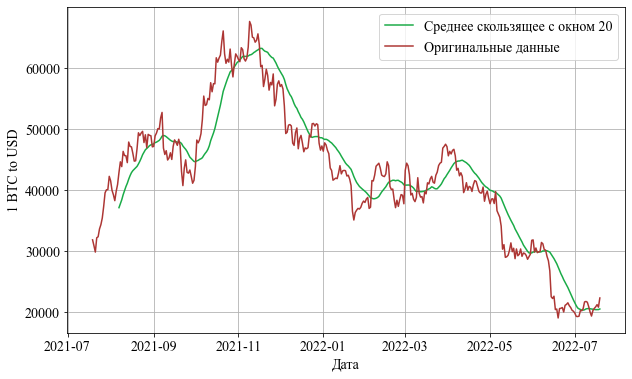

In [8]:
plt.figure(figsize=(10,6))
plt.plot(df.Date, df.Open.rolling(20).mean(), color='#1AAB47', label='Среднее скользящее с окном 20')
plt.plot(df.Date, df.Open, color='#AD3634', label='Оригинальные данные')
plt.xlabel('Дата')
plt.ylabel('1 BTC to USD')
plt.legend()
plt.grid()

In [9]:
df = df.rename(columns={'Date':'ds','Open':'y'})
df

,ds,y
0,2021-07-19,31800.011719
1,2021-07-20,30838.285156
2,2021-07-21,29796.285156
3,2021-07-22,32138.873047
4,2021-07-23,32305.958984
...,...,...
361,2022-07-15,20573.156250
362,2022-07-16,20834.103516
363,2022-07-17,21195.041016
364,2022-07-18,20781.912109


Предскажем цену биткоина на 25 дней

In [10]:
predictions = 25
train_df = df[:-predictions] 

In [11]:
train_df

,ds,y
0,2021-07-19,31800.011719
1,2021-07-20,30838.285156
2,2021-07-21,29796.285156
3,2021-07-22,32138.873047
4,2021-07-23,32305.958984
...,...,...
336,2022-06-20,20553.371094
337,2022-06-21,20594.294922
338,2022-06-22,20719.414063
339,2022-06-23,19986.607422


Создание модели и обучение

In [12]:
m = Prophet()
m.fit(train_df)

21:27:25 - cmdstanpy - INFO - Chain [1] start processing
21:27:25 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future = m.make_future_dataframe(periods=predictions)
forecast = m.predict(future)

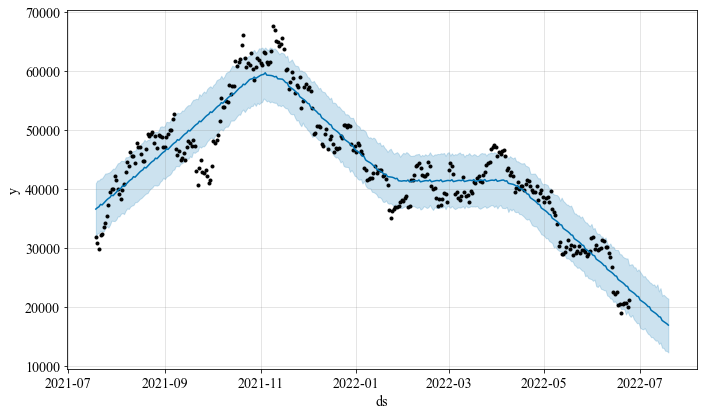

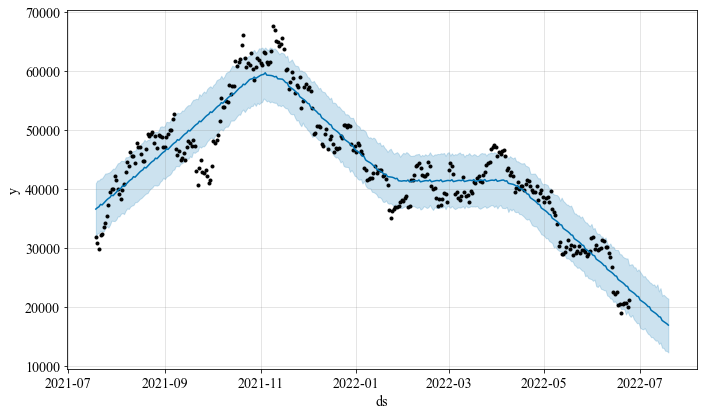

In [14]:
m.plot(forecast)

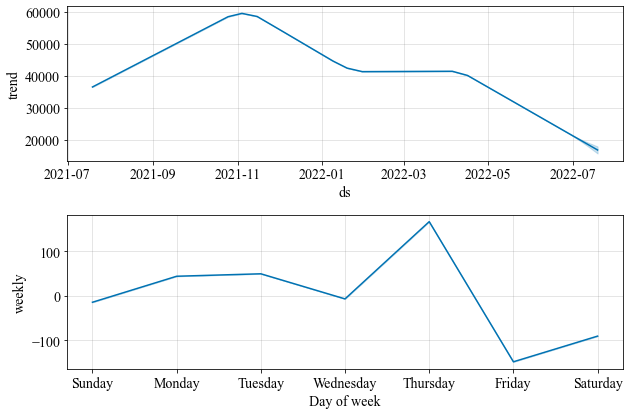

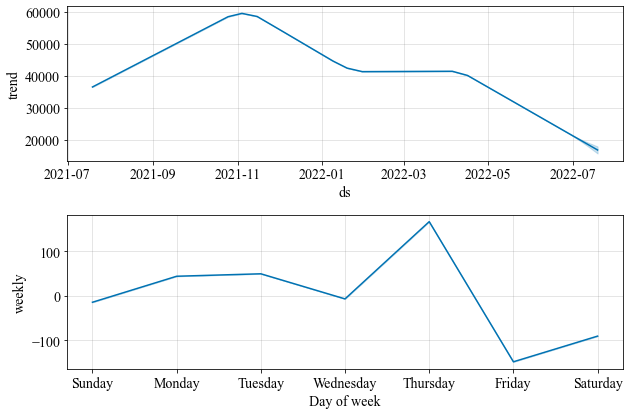

In [15]:
m.plot_components(forecast)

In [16]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-19,36522.790382,31741.154775,40949.178368,36522.790382,36522.790382,44.049381,44.049381,44.049381,44.049381,44.049381,44.049381,0.0,0.0,0.0,36566.839763
1,2021-07-20,36746.554837,32461.218110,41416.060043,36746.554837,36746.554837,49.585958,49.585958,49.585958,49.585958,49.585958,49.585958,0.0,0.0,0.0,36796.140795
2,2021-07-21,36970.319293,32502.391497,41431.816416,36970.319293,36970.319293,-6.928287,-6.928287,-6.928287,-6.928287,-6.928287,-6.928287,0.0,0.0,0.0,36963.391006
3,2021-07-22,37194.083748,32882.555876,41723.802964,37194.083748,37194.083748,166.946061,166.946061,166.946061,166.946061,166.946061,166.946061,0.0,0.0,0.0,37361.029809
4,2021-07-23,37417.848203,32775.174248,41780.703792,37417.848203,37417.848203,-148.501292,-148.501292,-148.501292,-148.501292,-148.501292,-148.501292,0.0,0.0,0.0,37269.346912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2022-07-15,17851.444795,13078.184538,21891.215172,17047.920261,18687.955073,-148.501292,-148.501292,-148.501292,-148.501292,-148.501292,-148.501292,0.0,0.0,0.0,17702.943503
362,2022-07-16,17603.922579,13051.376021,22052.835481,16726.467163,18495.462896,-90.692104,-90.692104,-90.692104,-90.692104,-90.692104,-90.692104,0.0,0.0,0.0,17513.230475
363,2022-07-17,17356.400364,12564.740279,21807.552553,16406.782906,18318.631455,-14.459718,-14.459718,-14.459718,-14.459718,-14.459718,-14.459718,0.0,0.0,0.0,17341.940646
364,2022-07-18,17108.878149,12536.431254,21543.637511,16079.636174,18134.509192,44.049381,44.049381,44.049381,44.049381,44.049381,44.049381,0.0,0.0,0.0,17152.927530


Расчет ошибки

In [17]:
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))

In [18]:
cmp_df = cmp_df.reset_index()

In [19]:
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print('MAPE, средняя относительная погрешность', np.mean(abs(cmp_df[-predictions:]['p'])))
print('MAE, средняя абсолютная погрешность', np.mean(abs(cmp_df[-predictions:]['e'])))

MAPE, средняя относительная погрешность 9.146011594853125
MAE, средняя абсолютная погрешность 1903.7175782758468


Сравнение модели и реальных данных

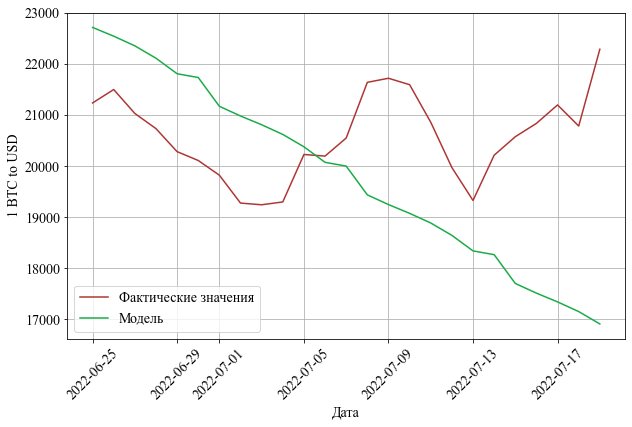

In [20]:
plt.figure(figsize=(10,6))
plt.plot(cmp_df[-predictions:].ds,cmp_df[-predictions:].y, label = 'Фактические значения', color='#AD3634')
plt.plot(cmp_df[-predictions:].ds,cmp_df[-predictions:].yhat, label = 'Модель', color='#1AAB47')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('1 BTC to USD')
plt.legend()
plt.grid()

Предсказание цены на 25 дней

In [21]:
forecast[-predictions:][['ds','yhat']]

,ds,yhat
341,2022-06-25,22711.196995
342,2022-06-26,22539.907166
343,2022-06-27,22350.894050
344,2022-06-28,22108.908412
345,2022-06-29,21804.871952
346,2022-06-30,21731.224084
347,2022-07-01,21168.254516
348,2022-07-02,20978.541489
349,2022-07-03,20807.251659
350,2022-07-04,20618.238543
